# **Library Imports**

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

# **Data Exploration**

In [77]:
# Load the training and test datasets
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_id=test['id_seqpos']

In [78]:
train.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_159f0ff46,id_159f0ff46_44,A,.,H,1.7786,0.1195,0.7346,0.0790,0.3680,...,(,),S,S,C,A,.,),I,S
1,id_d73546f4e,id_d73546f4e_38,G,.,I,0.4397,0.1033,0.1630,0.0799,0.0878,...,(,.,S,H,C,C,.,.,B,H
2,id_f3037fedf,id_f3037fedf_34,G,(,S,0.1120,0.1375,0.0000,0.0744,0.1835,...,(,(,S,S,A,G,(,(,S,S
3,id_468300749,id_468300749_12,G,(,S,0.0622,0.0471,0.1179,0.1075,0.0657,...,.,(,E,S,A,U,.,(,E,S
4,id_69e3878a2,id_69e3878a2_28,U,(,S,0.1378,0.1352,0.4069,0.2168,0.3375,...,(,(,S,S,G,G,(,.,S,H


In [79]:
test.head()

,id,id_seqpos,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,...,b4_structure,a4_structure,b4_predicted_loop_type,a4_predicted_loop_type,b5_sequence,a5_sequence,b5_structure,a5_structure,b5_predicted_loop_type,a5_predicted_loop_type
0,id_001f94081,id_001f94081_0,G,.,E,0.1359,0.2613,2.3375,0.2631,0.1501,...,-1,.,-1,E,-1,A,-1,(,-1,S
1,id_001f94081,id_001f94081_4,A,.,E,0.1314,0.1798,0.2635,0.1000,0.1369,...,.,(,E,S,-1,C,-1,(,-1,S
2,id_001f94081,id_001f94081_8,U,(,S,0.0756,0.1056,0.0530,0.0517,0.0705,...,.,.,E,H,A,U,.,.,E,H
3,id_001f94081,id_001f94081_9,C,(,S,0.1087,0.1896,0.5348,0.1474,0.1588,...,(,.,S,H,A,A,.,.,E,H
4,id_001f94081,id_001f94081_13,U,.,H,0.1388,0.1810,0.7699,0.1417,0.1382,...,(,.,S,H,U,G,(,),S,S


In [80]:
print(train.shape)
print(test.shape)

(130560, 45)
(32640, 42)


In [81]:
# Display basic information about the loaded data
print("Training Data Info:")
print(train.info())
print("\nTest Data Info:")
print(test.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130560 entries, 0 to 130559
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      130560 non-null  object 
 1   id_seqpos               130560 non-null  object 
 2   sequence                130560 non-null  object 
 3   structure               130560 non-null  object 
 4   predicted_loop_type     130560 non-null  object 
 5   reactivity              130560 non-null  float64
 6   reactivity_error        130560 non-null  float64
 7   deg_Mg_pH10             130560 non-null  float64
 8   deg_error_Mg_pH10       130560 non-null  float64
 9   deg_pH10                130560 non-null  float64
 10  deg_error_pH10          130560 non-null  float64
 11  deg_Mg_50C              130560 non-null  float64
 12  deg_error_Mg_50C        130560 non-null  float64
 13  deg_50C                 130560 non-null  float64
 14  

In [82]:
train.describe()

,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
count,130560.000000,130560.000000,130560.00000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000,130560.000000
mean,0.376570,2825.710861,0.44650,2332.806124,0.448538,6288.673592,0.405686,3579.976118,0.427428,5969.595514
std,0.730013,19105.915817,0.70582,14614.719469,1.300353,42323.269166,0.840844,23229.704416,1.126904,38182.352844
min,-20.664800,0.001900,-14.74050,0.006100,-44.515300,0.008300,-24.252500,0.004100,-38.339900,0.006500
25%,0.043800,0.044900,0.13130,0.057200,0.099900,0.073900,0.074100,0.052000,0.092700,0.081300
50%,0.216200,0.083000,0.28990,0.098800,0.276100,0.120500,0.256800,0.088800,0.308800,0.133700
75%,0.540400,0.172500,0.56760,0.200000,0.569100,0.244200,0.560000,0.181600,0.613825,0.265325
max,20.667500,146151.225000,14.74010,104235.174200,44.521200,314833.569500,24.252500,171525.321700,38.343800,271158.604000


In [83]:
test.describe()

,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_50C,deg_error_50C
count,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000,32640.000000
mean,2867.711465,2332.851217,0.440402,6308.833647,3591.413087,0.419736,6035.790535
std,19219.425971,14677.383270,1.225579,42379.018394,23269.401175,1.103974,38260.803049
min,0.003400,0.009200,-44.515300,0.009400,0.005700,-38.339900,0.008500
25%,0.044800,0.057100,0.098100,0.073700,0.051900,0.090400,0.081700
50%,0.083100,0.099400,0.271600,0.120800,0.089500,0.303900,0.134200
75%,0.174800,0.204600,0.565600,0.248600,0.186425,0.611100,0.267300
max,146151.225000,104235.174200,44.519700,314833.569500,171525.321700,38.339900,271158.604000


In [84]:
id_unique=train['id'].unique()
print(len(id_unique))

2400


# **Feature Enginerring**

## First Try

In [ ]:
df=train

delete before and after columns

In [ ]:
# List of columns to remove
columns_to_remove = [
    'b1_sequence', 'a1_sequence', 'b1_structure', 'a1_structure',
    'b1_predicted_loop_type', 'a1_predicted_loop_type', 'b2_sequence',
    'a2_sequence', 'b2_structure', 'a2_structure', 'b2_predicted_loop_type',
    'a2_predicted_loop_type', 'b3_sequence', 'a3_sequence', 'b3_structure',
    'a3_structure', 'b3_predicted_loop_type', 'a3_predicted_loop_type',
    'b4_sequence', 'a4_sequence', 'b4_structure', 'a4_structure',
    'b4_predicted_loop_type', 'a4_predicted_loop_type', 'b5_sequence',
    'a5_sequence', 'b5_structure', 'a5_structure', 'b5_predicted_loop_type',
    'a5_predicted_loop_type'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
test = test.drop(columns=columns_to_remove)

In [ ]:
# Sort the DataFrame based on 'id' and the newly created numerical 'id_seqpos_number'
df.sort_values(by=['id', 'pos'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Rename the 'id_seqpos_number' column to 'pos'
df.rename(columns={'id_seqpos': 'pos'}, inplace=True)
test.rename(columns={'id_seqpos': 'pos'}, inplace=True)

In [ ]:
df.head()

,id,pos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_Mg_50C,deg_error_Mg_50C,deg_50C,deg_error_50C
0,id_001f94081,1,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,0.2860,2.9683,0.2750,3.4773,0.3475
1,id_001f94081,2,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,0.0964,0.2589,0.0947,0.9988,0.1880
2,id_001f94081,3,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,0.1574,1.4552,0.1866,1.3228,0.2124
3,id_001f94081,5,A,(,S,0.4384,0.1050,0.3313,0.1371,0.3403,0.1019,0.4971,0.1148,0.5890,0.1481
4,id_001f94081,6,G,(,S,0.2560,0.0821,0.6763,0.1736,0.5617,0.1140,0.3819,0.0995,0.5231,0.1352


In [ ]:
test.head()

,id,pos,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_50C,deg_error_50C
0,id_001f94081,0,G,.,E,0.1359,0.2613,2.3375,0.2631,0.1501,0.6382,0.2167
1,id_001f94081,4,A,.,E,0.1314,0.1798,0.2635,0.1000,0.1369,0.7877,0.1703
2,id_001f94081,8,U,(,S,0.0756,0.1056,0.0530,0.0517,0.0705,0.0585,0.0638
3,id_001f94081,9,C,(,S,0.1087,0.1896,0.5348,0.1474,0.1588,0.7349,0.1804
4,id_001f94081,13,U,.,H,0.1388,0.1810,0.7699,0.1417,0.1382,1.0442,0.1777


**Add new features:**

1.   **is_first_5**: set 1 if the sequence is from the first 5 sequences else set 0.
2.   **is_paired_structure**: set 1 if the sequence is paired '(' or ')', set 0 if is unpaired '.'
3. **is_non_s_loop**: set 1 if the loop type is not 'S' type, else set 0.


In [ ]:
# Binary features
df['is_first_5'] = (df['pos'] < 5).astype(int)
df['is_paired_structure'] = (df['structure'].isin(['(', ')'])).astype(int)
df['is_non_s_loop'] = (df['predicted_loop_type'] != 'S').astype(int)

test['is_first_5'] = (test['pos'] < 5).astype(int)
test['is_paired_structure'] = (test['structure'].isin(['(', ')'])).astype(int)
test['is_non_s_loop'] = (test['predicted_loop_type'] != 'S').astype(int)

add new features ==> segment, average

for each id (for each mRNA), we want to segment the sequence for small segments, the size of segment ganna be 5 (as we see before, the first 5 bases have higher reactivty compared with others).
for each segment, ganna calculate the average value for each numeric column such as reactivity, deg_Mg_ph10 etc..

In [ ]:
columns_to_average = ['reactivity_error', 'deg_error_Mg_pH10', 'deg_pH10', 'deg_error_pH10',
                      'deg_error_Mg_50C', 'deg_50C', 'deg_error_50C']

segment_size = 5

# Calculate average error for each segment in train data
for column in columns_to_average:
    df['segment'] = df['pos'] // segment_size
    segment_error_mean = df.groupby(['id', 'segment'])[column].transform('mean')
    new_column_name = f'average_{column}'
    df[new_column_name] = segment_error_mean
    df.drop(columns=['segment'], inplace=True)

# Calculate average error for each segment in test data
for column in columns_to_average:
    test['segment'] = test['pos'] // segment_size
    segment_error_mean = test.groupby(['id', 'segment'])[column].transform('mean')
    new_column_name = f'average_{column}'
    test[new_column_name] = segment_error_mean
    test.drop(columns=['segment'], inplace=True)

In [ ]:
df.head()

,id,pos,sequence,structure,predicted_loop_type,reactivity,reactivity_error,deg_Mg_pH10,deg_error_Mg_pH10,deg_pH10,...,is_first_5,is_paired_structure,is_non_s_loop,average_reactivity_error,average_deg_error_Mg_pH10,average_deg_pH10,average_deg_error_pH10,average_deg_error_Mg_50C,average_deg_50C,average_deg_error_50C
0,id_001f94081,1,G,.,E,1.5693,0.2070,2.9830,0.3842,3.5060,...,1,0,1,0.171833,0.258167,1.605867,0.179933,0.185433,1.932967,0.249300
1,id_001f94081,2,A,.,E,1.1227,0.1633,0.2526,0.1372,0.3008,...,1,0,1,0.171833,0.258167,1.605867,0.179933,0.185433,1.932967,0.249300
2,id_001f94081,3,A,.,E,0.8686,0.1452,1.3789,0.2531,1.0108,...,1,0,1,0.171833,0.258167,1.605867,0.179933,0.185433,1.932967,0.249300
3,id_001f94081,5,A,(,S,0.4384,0.1050,0.3313,0.1371,0.3403,...,0,1,0,0.094500,0.163267,0.527667,0.116667,0.119733,0.708200,0.155567
4,id_001f94081,6,G,(,S,0.2560,0.0821,0.6763,0.1736,0.5617,...,0,1,0,0.094500,0.163267,0.527667,0.116667,0.119733,0.708200,0.155567


In [ ]:
test.head()

,id,pos,sequence,structure,predicted_loop_type,reactivity_error,deg_error_Mg_pH10,deg_pH10,deg_error_pH10,deg_error_Mg_50C,...,is_first_5,is_paired_structure,is_non_s_loop,average_reactivity_error,average_deg_error_Mg_pH10,average_deg_pH10,average_deg_error_pH10,average_deg_error_Mg_50C,average_deg_50C,average_deg_error_50C
0,id_001f94081,0,G,.,E,0.1359,0.2613,2.3375,0.2631,0.1501,...,1,0,1,0.13365,0.22055,1.3005,0.18155,0.14350,0.71295,0.1935
1,id_001f94081,4,A,.,E,0.1314,0.1798,0.2635,0.1000,0.1369,...,1,0,1,0.13365,0.22055,1.3005,0.18155,0.14350,0.71295,0.1935
2,id_001f94081,8,U,(,S,0.0756,0.1056,0.0530,0.0517,0.0705,...,0,1,0,0.09215,0.14760,0.2939,0.09955,0.11465,0.39670,0.1221
3,id_001f94081,9,C,(,S,0.1087,0.1896,0.5348,0.1474,0.1588,...,0,1,0,0.09215,0.14760,0.2939,0.09955,0.11465,0.39670,0.1221
4,id_001f94081,13,U,.,H,0.1388,0.1810,0.7699,0.1417,0.1382,...,0,0,1,0.13880,0.18100,0.7699,0.14170,0.13820,1.04420,0.1777


## Second Try (Split Data into two groups, then train each one separately)

In [102]:
df=train

In [103]:
# List of columns to remove
columns_to_remove = [
    'b1_sequence', 'a1_sequence', 'b1_structure', 'a1_structure',
    'b1_predicted_loop_type', 'a1_predicted_loop_type', 'b2_sequence',
    'a2_sequence', 'b2_structure', 'a2_structure', 'b2_predicted_loop_type',
    'a2_predicted_loop_type', 'b3_sequence', 'a3_sequence', 'b3_structure',
    'a3_structure', 'b3_predicted_loop_type', 'a3_predicted_loop_type',
    'b4_sequence', 'a4_sequence', 'b4_structure', 'a4_structure',
    'b4_predicted_loop_type', 'a4_predicted_loop_type', 'b5_sequence',
    'a5_sequence', 'b5_structure', 'a5_structure', 'b5_predicted_loop_type',
    'a5_predicted_loop_type'
]

# Remove the specified columns
df = df.drop(columns=columns_to_remove)
test = test.drop(columns=columns_to_remove)

In [104]:
# Split the data into two groups
# first5_unpaired_data = df[(df['pos'] < 5) & (df['structure'] == '.')]
rest_of_data = df[(df['pos'] >= 5) | (df['structure'] != '.')]

# Print the shapes of the resulting dataframes
# print("First 5 bases unpaired data shape:", first5_unpaired_data.shape)
print("Rest of the data shape:", rest_of_data.shape)

Rest of the data shape: (120986, 15)


In [ ]:
# {'A': 1, 'G': 3, 'C': 2, 'U': 0}
# {'S': 6, 'E': 2, 'H': 0, 'I': 5, 'X': 4, 'M': 3, 'B': 1}

# Define mapping dictionaries
sequence_mapping = {'A': 0, 'U': 1, 'G': 2, 'C': 3}
structure_mapping = {'.': 0, '(': 1, ')': 2}
loop_type_mapping = {'S': 0, 'H': 1, 'E': 2, 'M': 3, 'I': 4, 'X': 5, 'B': 6}

# Apply mapping to the categorical columns for rest_of_data
rest_of_data['sequence'] = rest_of_data['sequence'].map(sequence_mapping)
rest_of_data['structure'] = rest_of_data['structure'].map(structure_mapping)
rest_of_data['predicted_loop_type'] = rest_of_data['predicted_loop_type'].map(loop_type_mapping)

# Apply mapping to the categorical columns for rest_of_data
test['sequence'] = test['sequence'].map(sequence_mapping)
test['structure'] = test['structure'].map(structure_mapping)
test['predicted_loop_type'] = test['predicted_loop_type'].map(loop_type_mapping)

# **Modeling**

## Splitting into train and validate

In [106]:
# Split the rest data into features (X) and target (y)
features_rest = rest_of_data.drop(['id', 'reactivity', 'deg_Mg_pH10', 'deg_Mg_50C'], axis=1)
target_rest = rest_of_data[['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']]

test = test.drop(['id'], axis=1)

In [107]:
X_train_rest, X_val_rest, y_train_rest, y_val_rest = train_test_split(features_rest, target_rest, test_size=0.10, random_state=13)
X_test = test

## MultiOutputReg with xgboost model

In [108]:
def mcrmse_loss(y_true, y_pred, N=3):
    assert len(y_true) == len(y_pred)
    n = len(y_true)
    return np.sum(np.sqrt(np.sum((y_true - y_pred)**2, axis=0)/n)) / N

custom_scorer = make_scorer(mcrmse_loss, greater_is_better=False)

# Define your XGBRegressor
xgb = XGBRegressor(
    subsample=0.8,
    colsample_bytree=0.80,
    reg_lambda=1,
    reg_alpha=1,
    random_state=13
)

# Define the parameter grid for tuning
params = {
    'estimator__n_estimators': [600],
    'estimator__learning_rate': [0.1],
    'estimator__max_depth': [5]
}

In [109]:
reg = MultiOutputRegressor(xgb)

# Perform grid search with cross-validation for the rest of the data
gs_rest = GridSearchCV(
    reg,
    param_grid=params,
    cv=2,  # Number of folds for cross-validation
    return_train_score=True,
    n_jobs=-1,  # Use all available CPU cores
    scoring=custom_scorer
)
gs_rest.fit(X_train_rest, y_train_rest)

# Get the best estimator with tuned hyperparameters for the rest of the data
best_estimator_rest = gs_rest.best_estimator_

y_pred_train_rest = best_estimator_rest.predict(X_train_rest)
y_pred_val_rest = best_estimator_rest.predict(X_val_rest)

mcrmse_train_rest = mcrmse_loss(y_train_rest, y_pred_train_rest)
mcrmse_val_rest = mcrmse_loss(y_val_rest, y_pred_val_rest)

print(f"Custom MCRMSE (Training) for the rest of the data: {mcrmse_train_rest}")
print(f"Custom MCRMSE (Validation) for the rest of the data: {mcrmse_val_rest}")

Custom MCRMSE (Training) for the rest of the data: 0.20025631589535772
Custom MCRMSE (Validation) for the rest of the data: 0.35439888952294907


In [74]:
test_predictions_rest = best_estimator_rest.predict(X_test)

# Create a DataFrame to hold the combined predictions for submission
submission_df = pd.DataFrame({
    'id_seqpos': test_id,
    'reactivity': test_predictions_rest[:, 0],  # Extracting the reactivity predictions
    'deg_Mg_pH10': test_predictions_rest[:, 1],  # Extracting the deg_Mg_pH10 predictions
    'deg_Mg_50C': test_predictions_rest[:, 2]  # Extracting the deg_Mg_50C predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission20.csv', index=False)

xgb Feature Importance

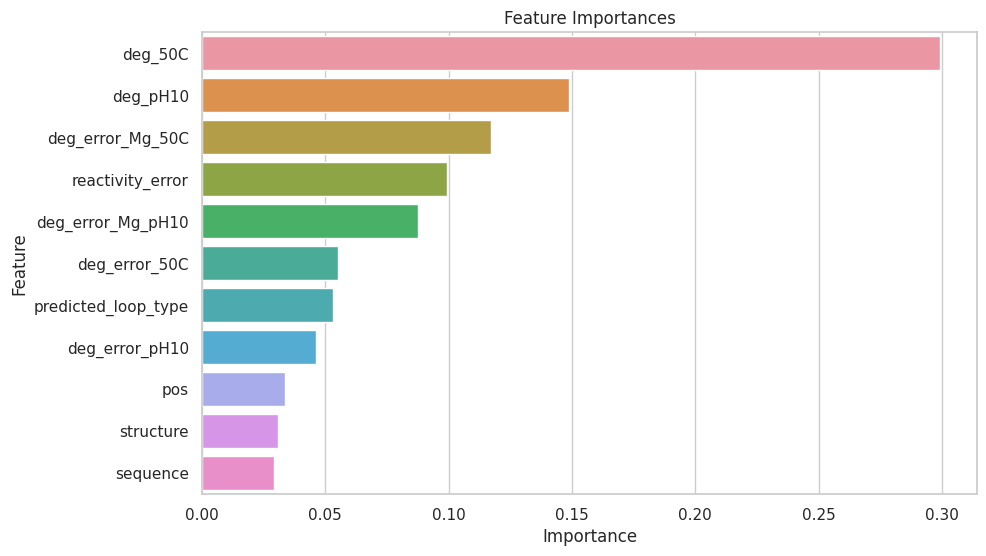

In [111]:
# Train the XGBoost model
xgb = XGBRegressor(
    subsample=0.8,
    colsample_bytree=0.75,
    reg_lambda=2,
    reg_alpha=1,
    random_state=13
)
xgb.fit(X_train_rest, y_train_rest)

# Get feature importances
feature_importances = xgb.feature_importances_

# Get the names of the features
feature_names = X_train_rest.columns

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Random Forst

In [119]:
# Define your RandomForestRegressor
rf = RandomForestRegressor(
    n_estimators=10,
    random_state=13
)

# Define the parameter grid for tuning
params = {
    'estimator__n_estimators': [50]
}

rf.fit(X_train_rest, y_train_rest)

y_pred_train_rest = rf.predict(X_train_rest)
y_pred_val_rest = rf.predict(X_val_rest)

mcrmse_train_rest = mcrmse_loss(y_train_rest, y_pred_train_rest)
mcrmse_val_rest = mcrmse_loss(y_val_rest, y_pred_val_rest)

print(f"Custom MCRMSE (Training) for the rest of the data: {mcrmse_train_rest}")
print(f"Custom MCRMSE (Validation) for the rest of the data: {mcrmse_val_rest}")

Custom MCRMSE (Training) for the rest of the data: 0.19924006924440316
Custom MCRMSE (Validation) for the rest of the data: 0.4803534485463122


In [120]:
test_predictions_rest = rf.predict(X_test)

# Create a DataFrame to hold the combined predictions for submission
submission_df = pd.DataFrame({
    'id_seqpos': test_id,
    'reactivity': test_predictions_rest[:, 0],  # Extracting the reactivity predictions
    'deg_Mg_pH10': test_predictions_rest[:, 1],  # Extracting the deg_Mg_pH10 predictions
    'deg_Mg_50C': test_predictions_rest[:, 2]  # Extracting the deg_Mg_50C predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission22_rf_10n.csv', index=False)

## Gradiant Boosting

In [ ]:
# Define your GradientBoostingRegressor
gb = GradientBoostingRegressor(
    n_estimators=600,
    random_state=13
)

# Define the parameter grid for tuning
params = {
    'estimator__n_estimators': [600]
}

reg = MultiOutputRegressor(gb)

# Perform grid search with cross-validation for the rest of the data
gs_rest = GridSearchCV(
    reg,
    param_grid=params,
    cv=2,  # Number of folds for cross-validation
    return_train_score=True,
    n_jobs=-1,  # Use all available CPU cores
    scoring=custom_scorer
)
gs_rest.fit(X_train_rest, y_train_rest)

# Get the best estimator with tuned hyperparameters for the rest of the data
best_estimator_rest = gs_rest.best_estimator_

y_pred_train_rest = best_estimator_rest.predict(X_train_rest)
y_pred_val_rest = best_estimator_rest.predict(X_val_rest)

mcrmse_train_rest = mcrmse_loss(y_train_rest, y_pred_train_rest)
mcrmse_val_rest = mcrmse_loss(y_val_rest, y_pred_val_rest)

print(f"Custom MCRMSE (Training) for the rest of the data: {mcrmse_train_rest}")
print(f"Custom MCRMSE (Validation) for the rest of the data: {mcrmse_val_rest}")

In [ ]:
test_predictions_rest = best_estimator_rest.predict(X_test)

# Create a DataFrame to hold the combined predictions for submission
submission_df = pd.DataFrame({
    'id_seqpos': test_id,
    'reactivity': test_predictions_rest[:, 0],  # Extracting the reactivity predictions
    'deg_Mg_pH10': test_predictions_rest[:, 1],  # Extracting the deg_Mg_pH10 predictions
    'deg_Mg_50C': test_predictions_rest[:, 2]  # Extracting the deg_Mg_50C predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission19_gb.csv', index=False)

# **Evaluation**

In [ ]:
# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(
    gs_rest, X_train_rest, y_train_rest, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=3
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()